<a href="https://colab.research.google.com/github/nnttluna/pneumonia_diagnosis-image_classification/blob/main/pneumonia_diagnosis_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# image importing resources
import cv2
import glob
from PIL import Image
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# building a neural network model
import tensorflow as tf
from keras.layers import Activation, Dense
from keras.models import Sequential
#modules for metrics
from keras import optimizers
from keras import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [24]:
#importing the Normal chest xray folder
cv_img = [] # array to store all the images
y_Vals = [] # array to store their associated label
for img in glob.glob("/content/drive/MyDrive/Portfolio/x-ray-pneumonia-image/train/NORMAL/*.jpeg"):
  normal = cv2.imread(img)
  resized = cv2.resize(normal,(200,200),interpolation = cv2.INTER_AREA) # resizing image
  cv_img.append(resized) #add normal images into the general image array
  y_Vals.append("N")

In [25]:
#importing the Pneumonia chest xray folder
for img in glob.glob("/content/drive/MyDrive/Portfolio/x-ray-pneumonia-image/train/PNEUMONIA/*.jpeg"):
  pneumonia = cv2.imread(img)
  resized2 = cv2.resize(pneumonia,(200,200),interpolation = cv2.INTER_AREA)# resizing image
  cv_img.append(resized2) #add pneumonia images into the general image array
  y_Vals.append("P")

In [26]:
cv_img = np.array(cv_img) # converting image list to an array
cv_img[1].shape

(200, 200, 3)

In [27]:
# splitting data, using 80% for training
X_train, X_test, y_train, y_test = train_test_split(cv_img, y_Vals, random_state=0, train_size=0.8)

In [28]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
# Model / data parameters
num_classes = 2 # normal or pneumonia
input_shape = (200, 200, 3) # size of each image
# Scale images to the [0 - 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")
# convert class vectors to binary class matrices
# Converting every 'N' and 'P ' to [01] = N or [10] = P
numbers, labels = pd.factorize(y_train)
y_train = tf.keras.utils.to_categorical(numbers, num_classes=2)
numbers, labels = pd.factorize(y_test)
y_test = tf.keras.utils.to_categorical(numbers, num_classes=2)

x_train shape: (3764, 200, 200, 3)
3764 train samples
941 test samples


In [29]:
# creating the CNN Model
model = keras.Sequential(
  [
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
  ]
)

In [30]:
batch_size = 64
epochs = 8
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)

In [31]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.11627820879220963
Test accuracy: 0.9617428183555603


30/30 [==============================] - 16s 514ms/step


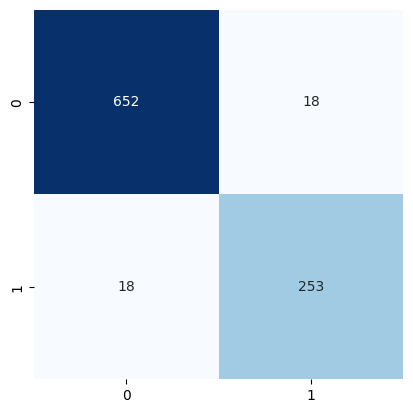

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
y_pred = model.predict(X_test)
y_pred_c = np.argmax(y_pred, axis=1)
y_test_c = np.argmax(y_test, axis=1)
matrix_confusion = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False )
plt.show()